# THE SPARKS FOUNDATION
(DATA SCIENCE AND BUSSINESS ANALYTICS)

GRIPSEPT-2021

# TASK-2


## Author:SUBALAKSHMI P

### Retail Superstore Exploratory Data Visualisation

# Importing Libraries

In [1]:
#Backend of matplotlib 
%matplotlib inline
#To import and analyze data
import pandas as pd  
#To perform the multi-dimensional operation
import numpy as np 
#To perform graphical plot into the context
import matplotlib.pyplot as plt
#To visualize data 
import seaborn as sns
import warnings
sns.set_style('darkgrid')
print("Libraries imported effectively")

Libraries imported effectively


In [2]:
data=pd.read_csv("SampleSuperstore.csv")

# Statistical data

In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
data.shape   #no.of rows and columns in the dataset

(9994, 13)

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
data.isna().sum().to_frame("Null values")         #Checking for the null values 

,Null values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [8]:
data.nunique()   #Count of unique values

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Data visualization

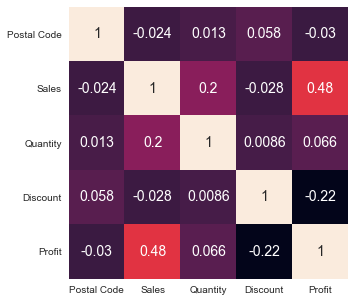

In [9]:
# PLotting Correlation between Variables
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

### In this Heat map we can see that,discounts and profit has a negative correlation,Quantity and profit are less correlation and Profit and sales have a strong correlation.


# Based on category and Sub-Category

In [10]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Total items Sold: 37873


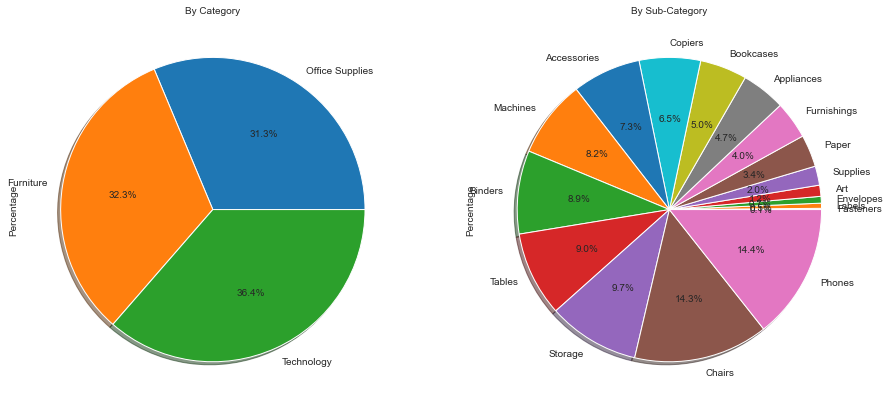

In [12]:
# Items sold by Category and Sub-category
cat = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {data.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,20))
ax[0].set_title('By Category', fontsize=10)
ax[1].set_title('By Sub-Category', fontsize=10)
cat.Count.plot.pie(autopct='%1.1f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.1f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

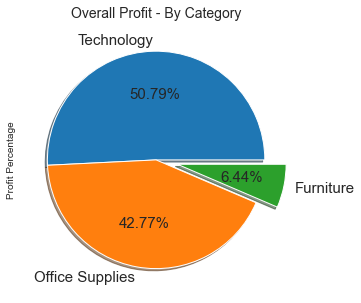

In [13]:
# Profit by Category

cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(5,5), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

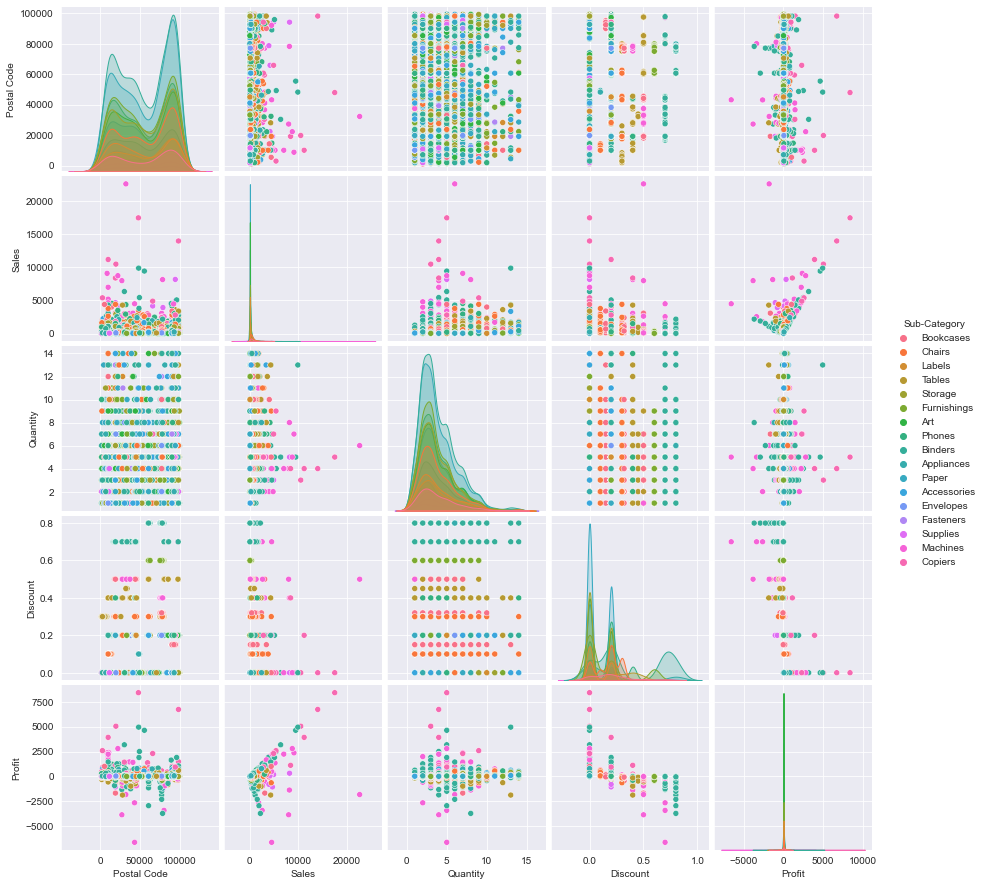

In [14]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

# Ship mode

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

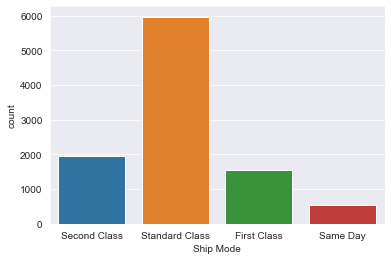

In [15]:
sns.countplot(x=data['Ship Mode'])

# Sales per ship mode

<Figure size 1440x1080 with 0 Axes>

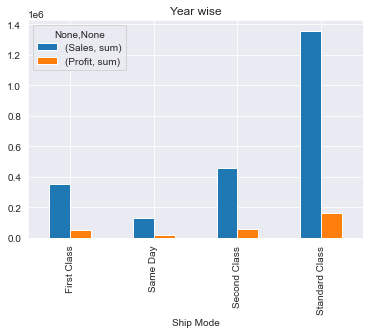

In [16]:
plt.figure(figsize=(20,15))
data.groupby(['Ship Mode'])[['Sales','Profit']].agg(['sum']).plot.bar()
plt.title("Year wise")
plt.show()

# Interdependency of Sales,Profits and Discounts

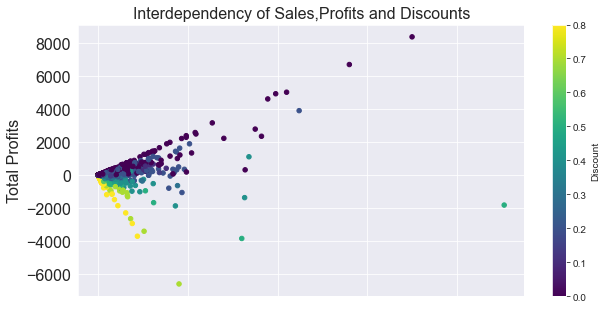

In [17]:
data.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)
plt.show()

# Analysis on Discount,Quantity and Profit

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

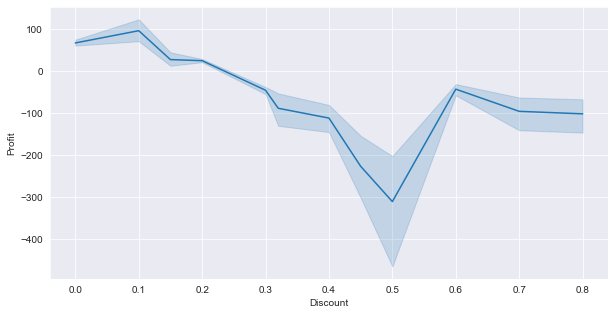

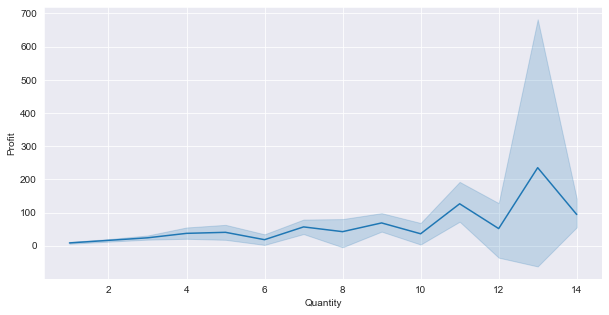

In [18]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize=(10,5))
sns.lineplot(data['Discount'],data['Profit'],data=data)
plt.figure(figsize=(10,5))
sns.lineplot(data['Quantity'],data['Profit'],data=data)

# State wise Analysis

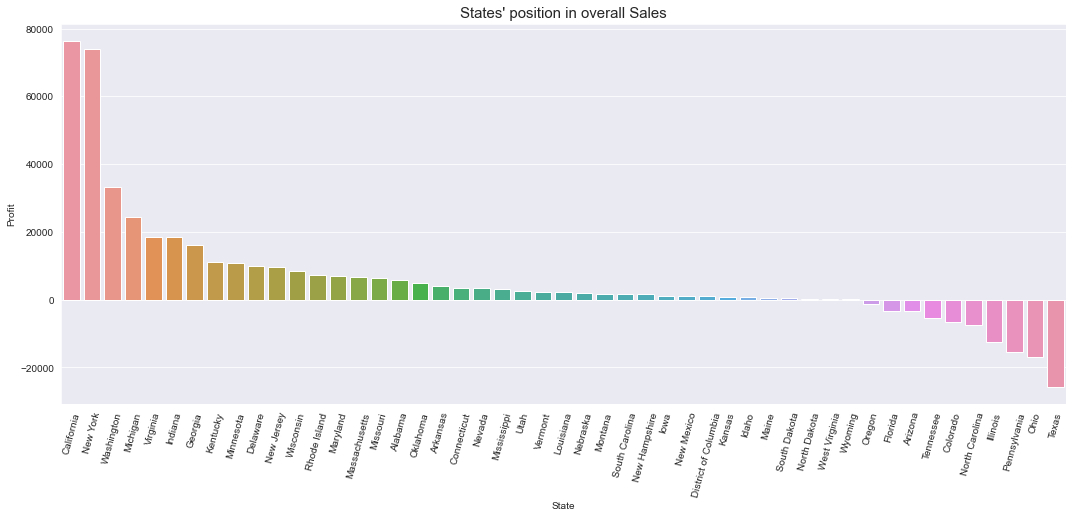

In [19]:
# Total Profit for each State
state_P = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States' position in overall Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

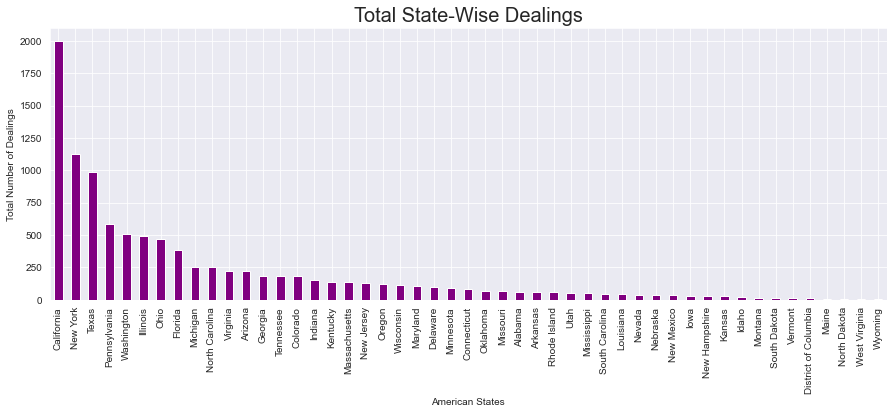

In [20]:
# Total dealings for each State
df_state_dealings = data.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5),
color='purple')                                                                                                      
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 20)
plt.show()

### From this,the notable highest dealings in the state of California with around 2k of total dealings 

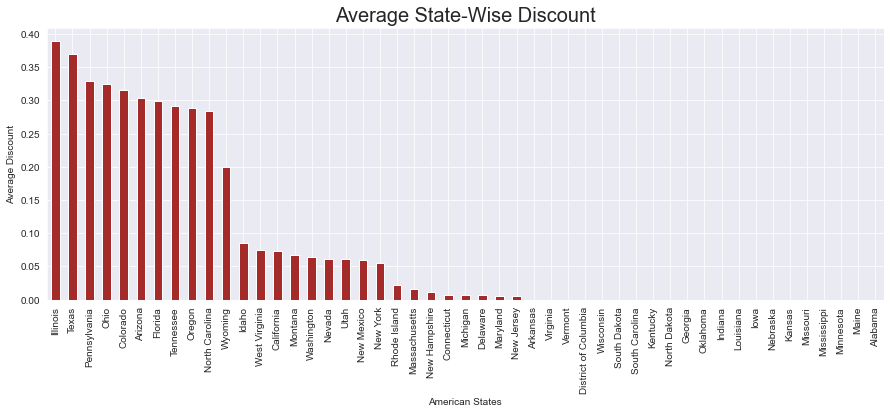

In [21]:
# Average Discount for each State
df_state_profit = data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
color='brown')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

# Region wise Analysis

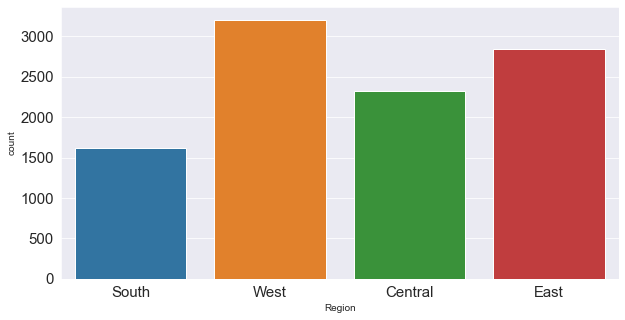

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Region',data=data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

REGION-WISE SALES SUMMARY


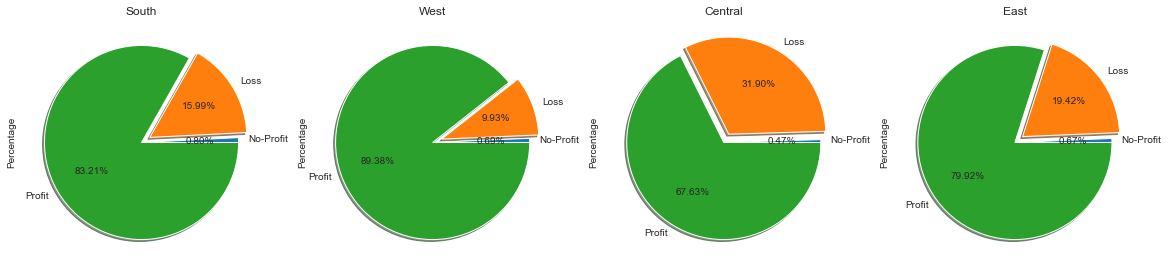

In [23]:
summ_sou = pd.DataFrame({'Profit':data[(data.Region == 'South') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'South') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'South') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':data[(data.Region == 'West') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'West') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'West') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_cent = pd.DataFrame({'Profit':data[(data.Region == 'Central') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'Central') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'Central') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':data[(data.Region == 'East') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'East') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'East') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(20,10))
print('REGION-WISE SALES SUMMARY')
ax[0].set_title('South')
ax[1].set_title('West')
ax[2].set_title('Central')
ax[3].set_title('East')
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

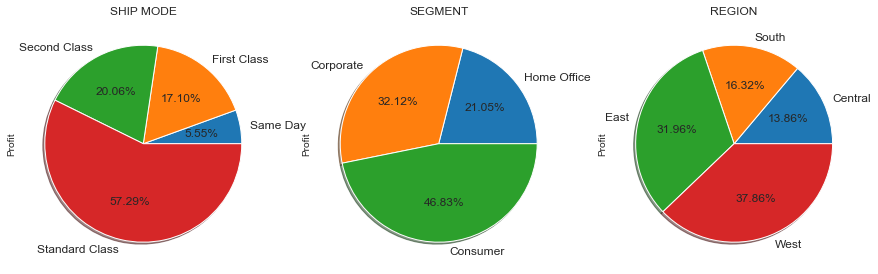

In [24]:
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

## Findings :-


### Central region facing more loss in sales compared with others.


### Supply of Furniture results in high loss

# Conclusion
   The product must be sell with no discounts to become the best profitable one when there is loss due to giving discounts on its products.